In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import os
import seaborn as sns

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-approval-prediction/credit_record.csv
/kaggle/input/credit-card-approval-prediction/application_record.csv


In [2]:
CreditRecord = pd.read_csv('/kaggle/input/credit-card-approval-prediction/credit_record.csv')
appRecord = pd.read_csv('/kaggle/input/credit-card-approval-prediction/application_record.csv')

### Data exploration

In [3]:
print(CreditRecord.shape, appRecord.shape)

(1048575, 3) (438557, 18)


In [4]:
CreditRecord.head(5)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
CreditRecord['MONTHS_BALANCE'].value_counts()

-1     34436
-2     34209
 0     33856
-3     33854
-4     33365
       ...  
-56     2109
-57     1649
-58     1255
-59      820
-60      415
Name: MONTHS_BALANCE, Length: 61, dtype: int64

In [6]:
appRecord.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [7]:
for column in appRecord.columns:
    if column != 'AMT_INCOME_TOTAL':
        print(pd.unique(appRecord[column]))

[5008804 5008805 5008806 ... 6841878 6842765 6842885]
['M' 'F']
['Y' 'N']
['Y' 'N']
[ 0  1  3  2  4  5 14 19  7  9 12  6]
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
[-12005 -21474 -19110 ...  -8169  -9738 -22257]
[-4542 -1134 -3051 ... -8300 -9020 -4884]
[1]
[1 0]
[0 1]
[0 1]
[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
[ 2.  1.  5.  3.  4.  6. 15.  7. 20.  9. 11. 14.  8.]


In [8]:
CreditRecord['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [9]:
appRecord.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

<AxesSubplot:xlabel='STATUS', ylabel='MONTHS_BALANCE'>

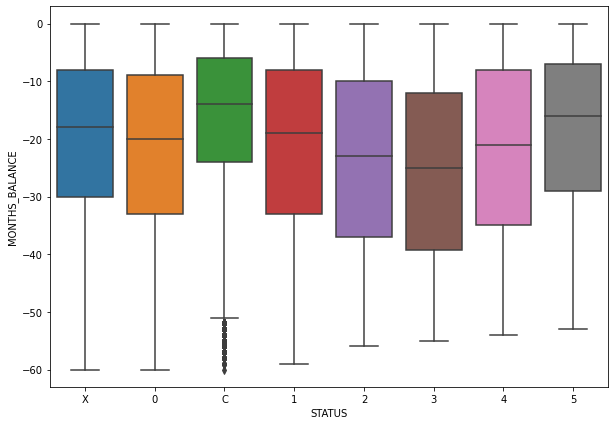

In [10]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=CreditRecord['STATUS'], y=CreditRecord['MONTHS_BALANCE'])

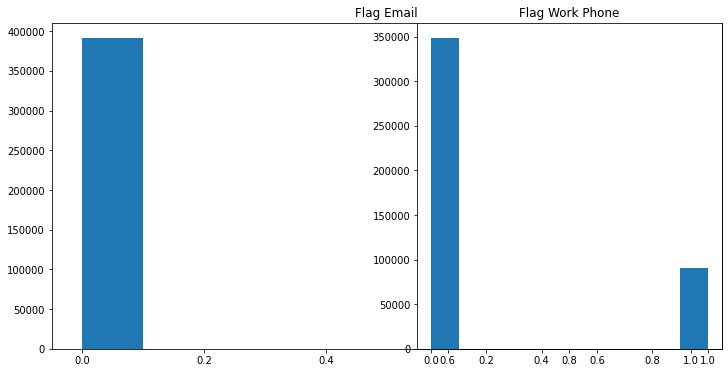

In [11]:
fig = plt.figure(figsize=(5, 3))

ax_1 = fig.add_subplot(1, 1, 1)
ax_2 = fig.add_subplot(1, 2, 2)

ax_1.hist(appRecord['FLAG_EMAIL'])
ax_1.set_title("Flag Email")

ax_2.hist(appRecord['FLAG_WORK_PHONE'])
ax_2.set_title("Flag Work Phone")
fig.set_size_inches(12,6)
plt.show()

### Data preprocessing

In [12]:
appRecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

objectColumns = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]
for objColumn in objectColumns:
    label = LabelEncoder()
    appRecord[objColumn] = label.fit_transform(appRecord[objColumn].values)

In [14]:
Ocupation_dict = {'Security staff':0, 'Sales staff':1, 
                  'Accountants':2, 'Laborers':3, 
                  'Managers':4,'Drivers':5, 
                  'Core staff':6, 'High skill tech staff':7, 
                  'Cleaning staff':8,'Private service staff':9,
                  'Cooking staff':10, 'Low-skill Laborers':11,
                  'Medicine staff':12, 'Secretaries':13,
                  'Waiters/barmen staff':14, 'HR staff':15,
                  'Realty agents':16, "IT staff":17}

appRecord['OCCUPATION_TYPE'] = appRecord['OCCUPATION_TYPE'].map(Ocupation_dict)

In [15]:
appRecord.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], inplace=True, axis=1)

In [16]:
map_status = {'C' : 1,
              'X' : 1,
              '0' : 1,
              '1' : 0,
              '2' : 0,
              '3' : 0,
              '4' : 0,
              '5' : 0}
CreditRecord["STATUS"] = CreditRecord['STATUS'].map(map_status)

In [17]:
CreditRecord['STATUS'].value_counts()

1    1034381
0      14194
Name: STATUS, dtype: int64

In [18]:
df_credit = appRecord.merge(CreditRecord, how='inner', on=['ID'])
df_credit.head(6)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,0,1
1,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,-1,1
2,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,-2,1
3,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,-3,1
4,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,-4,1
5,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,-5,1


## Train models

Split data to train and test

In [19]:
from sklearn.model_selection import train_test_split

target = df_credit['STATUS']
features = df_credit.drop(['STATUS'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.75)

### Logistic Regression

Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('lr', LogisticRegression())
])

In [21]:
grid_param = {
    'lr__solver': ['liblinear'],
    'lr__C': np.logspace(-4, 4, 20),
    'lr__penalty': ["l1", "l2"]
}

grid_search = GridSearchCV(pipeline, param_grid=grid_param, n_jobs=-1, cv=4, return_train_score=True, scoring='roc_auc')
grid_search.fit(X_train, y_train.values.ravel())

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='most_frequent')),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'lr__penalty': ['l1', 'l2'],
                         'lr__solver': ['liblinear']},
             return_train_score=True, scoring='roc_auc')

In [22]:
grid_search.best_estimator_

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('lr',
                 LogisticRegression(C=1438.44988828766, penalty='l1',
                                    solver='liblinear'))])

In [23]:
grid_search.best_score_

0.5681242170663845

Metrics

In [24]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, ConfusionMatrixDisplay, confusion_matrix

prediction = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, prediction)

0.5663156202310098

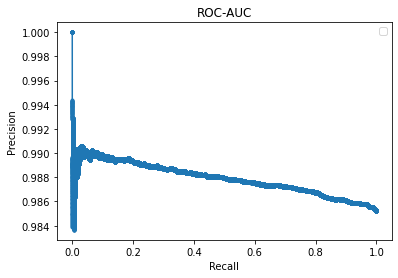

In [25]:
precision, recall, th = precision_recall_curve(y_test, prediction)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()

### KNN

Tuning

In [26]:
pipelineKNN = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("knn", KNeighborsClassifier())
])

In [27]:
grid_knn_param = {
    'knn__weights': ['uniform', 'distance'],
    'knn__n_neighbors': range(2, 8)
}

grid_search_KNN = GridSearchCV(pipelineKNN, param_grid=grid_knn_param, n_jobs=-1, cv=5, scoring='roc_auc')
grid_search_KNN.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='most_frequent')),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(2, 8),
                         'knn__weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [28]:
grid_search_KNN.best_estimator_

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('knn',
                 KNeighborsClassifier(n_neighbors=7, weights='distance'))])

Metrics

In [29]:
predictionKNN = grid_search_KNN.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, predictionKNN)

0.8448556455963243

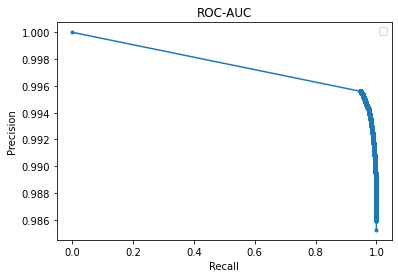

In [30]:
precision, recall, th = precision_recall_curve(y_test, predictionKNN)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()

### Random Forest

Tuning and training

In [31]:
pipelineForest = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('forest', RandomForestClassifier())
])

In [32]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train)
X_train = imputer.transform(X_train)

In [33]:
imputer.fit(X_test)
X_test = imputer.transform(X_test)

In [34]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest.score(X_train, y_train)

0.9999862846013791

Metrics

In [35]:
predictionForest = forest.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, predictionForest)

0.8578382217831707

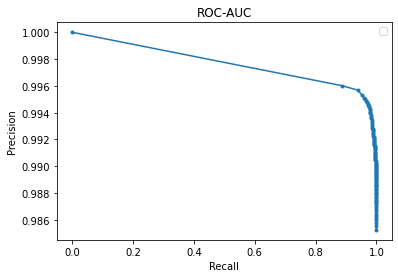

In [36]:
precision, recall, th = precision_recall_curve(y_test, predictionForest)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()

### Decision Tree

Tuning

In [37]:
pipelineTree = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('tree', DecisionTreeClassifier())
])

In [38]:
grid_tree_params = {
    'tree__max_depth': [7, 9, 11, 13],
    'tree__min_samples_leaf': [8, 10, 12, 15]
}

In [39]:
grid_search_tree = GridSearchCV(pipelineTree, param_grid=grid_tree_params, n_jobs=-1, cv=5, scoring='roc_auc')
grid_search_tree.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='most_frequent')),
                                       ('tree', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'tree__max_depth': [7, 9, 11, 13],
                         'tree__min_samples_leaf': [8, 10, 12, 15]},
             scoring='roc_auc')

Metrics

In [40]:
predictionTree = grid_search_tree.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, predictionTree)

0.7070609949354476

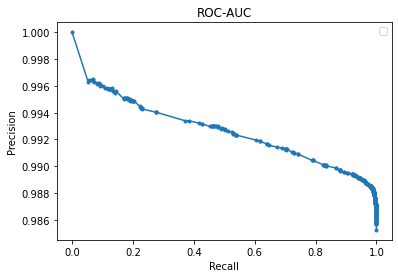

In [41]:
precision, recall, th = precision_recall_curve(y_test, predictionTree)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()

### Gradient Boosting

In [42]:
boost = GradientBoostingClassifier(n_estimators=200, max_depth=10)
boost.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GradientBoostingClassifier(max_depth=10, n_estimators=200)

Mertics

In [43]:
predictionBoost = boost.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, predictionBoost)

0.875185772426501

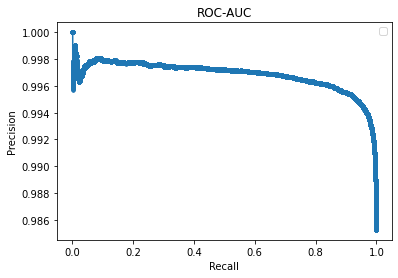

In [44]:
precision, recall, th = precision_recall_curve(y_test, predictionBoost)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()

### Ada Boost

In [45]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), n_estimators=250)
adaBoost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   n_estimators=250)

In [46]:
predictionAda = adaBoost.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, predictionAda)

0.8566578844607096

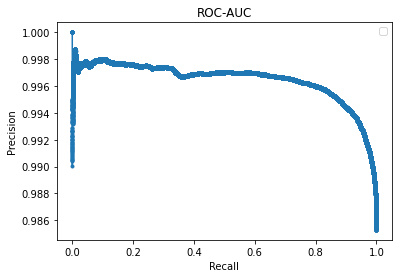

In [47]:
precision, recall, th = precision_recall_curve(y_test, predictionAda)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()

##### Best model is gradient boosting with roc-auc score: 0.86. Random forest and adaBoost show high score (0.85, 0.84). Among non-ensemble methods, KNN turned out to be the best (0.838).